# Introdução ao Brazil Data Cube


#### Biblioteca própria para a utilização

In [52]:
import pystac_client
import os
from urllib.parse import urlparse

import requests
from pystac import Asset
from tqdm import tqdm
import os
from urllib.parse import urlparse

import numpy as np
import requests
import rasterio
from rasterio.plot import reshape_as_image
from pystac import Asset
from tqdm import tqdm
from PIL import Image


### Conectando-se ao serviço e listando as collections disponíveis

In [53]:
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')


In [54]:
for collection in service.get_collections():
    print(collection)

<CollectionClient id=mosaic-cbers4a-paraiba-3m-1>
<CollectionClient id=LCC_L8_30_16D_STK_Cerrado-1>
<CollectionClient id=mosaic-landsat-sp-6m-1>
<CollectionClient id=mosaic-s2-paraiba-3m-1>
<CollectionClient id=LCC_L8_30_16D_STK_MataAtlantica-1>
<CollectionClient id=mosaic-s2-yanomami_territory-6m-1>
<CollectionClient id=LCC_L8_30_16D_STK_Pantanal-1>
<CollectionClient id=LCC_L8_30_1M_STK_Cerrado-1>
<CollectionClient id=mosaic-landsat-amazon-3m-1>
<CollectionClient id=LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1>
<CollectionClient id=mosaic-landsat-brazil-6m-1>
<CollectionClient id=mod13q1-6.1>
<CollectionClient id=mosaic-s2-amazon-3m-1>
<CollectionClient id=charter-wfi-1>
<CollectionClient id=mosaic-s2-cerrado-4m-1>
<CollectionClient id=mosaic-cbers4-brazil-3m-1>
<CollectionClient id=CB4-PAN10M-L2-DN-1>
<CollectionClient id=LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1>
<CollectionClient id=mosaic-s2-cerrado-2m-1>
<CollectionClient id=LCC_L8_30_16D_STK_Pampa-1>
<CollectionClient id=LCC_L8_30_1M_STK_PA-SPC-

### Escolhendo uma collection em específico e trabalhando com ela

In [55]:
collection = service.get_collection('S2-16D-2')
collection

<CollectionClient id=S2-16D-2>

In [56]:
collection.get_items()


<generator object CollectionClient.get_items at 0x77de10f69070>

### Search de imagens padrão utilizando bounding box

In [57]:
item_search = service.search(bbox=(-61.7960,-9.0374,-61.7033,-8.9390),
                             datetime='2024-08-01/2024-12-25',
                             collections=['S2-16D-2'])
item_search


### .matched() Utilizado para visualizar a quantidades de itens obtidaos do serach


In [58]:
item_search.matched()


10

### Passando por cada item para uma visualização

In [59]:
for item in item_search.items():
    print(item)

<Item id=S2-16D_V2_014015_20241218>
<Item id=S2-16D_V2_014015_20241202>
<Item id=S2-16D_V2_014015_20241116>
<Item id=S2-16D_V2_014015_20241031>
<Item id=S2-16D_V2_014015_20241015>
<Item id=S2-16D_V2_014015_20240929>
<Item id=S2-16D_V2_014015_20240913>
<Item id=S2-16D_V2_014015_20240828>
<Item id=S2-16D_V2_014015_20240812>
<Item id=S2-16D_V2_014015_20240727>


In [60]:
assets = item.assets


In [61]:
for k in assets.keys():
    print(k)

B01
B02
B03
B04
B05
B06
B07
B08
B09
B11
B12
B8A
EVI
NBR
SCL
NDVI
CLEAROB
TOTALOB
thumbnail
PROVENANCE


In [62]:
blue_asset = assets['B02']
blue_asset

<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B02.tif>

In [63]:
for asset in assets.values():
    print(asset)

<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B01.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B02.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B03.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B04.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B05.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B06.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B07.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B08.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2024/07/27/S2-16D_V2_014015_20240727_B09.tif>
<Asset href=https://data.inpe.br/bdc/data/s2-1

### A biblioteca rasterio e numpy podem ser usadas para ler image files do BDC

In [64]:
import rasterio


In [65]:
# with rasterio.open(assets['B08'].href) as nir_ds:
#     nir = nir_ds.read(1)

In [66]:
# nir

In [67]:
from rasterio.windows import Window


#### Função básica para ler as raster windows como numpy.ma.masked_array

In [68]:
def read(uri: str, window: Window, masked: bool = True):
    """Read raster window as numpy.ma.masked_array."""
    with rasterio.open(uri) as ds:
        return ds.read(1, window=window, masked=masked)

#### Podemos especificar um subconjunto do arquivo de imagem (janela ou pedaço) para ser lido. Vamos ler um intervalo que começa no pixel (0, 0) com 500 x 500 e coluna 0 a coluna 500, para as bandas espectrais vermelho, verde e azul:

In [69]:
red = read(assets['B04'].href, window=Window(0, 0, 500, 500)) # Window(col_off, row_off, width, height)
green = read(assets['B03'].href, window=Window(0, 0, 500, 500))
blue = read(assets['B02'].href, window=Window(0, 0, 500, 500))


In [70]:
blue


masked_array(
  data=[[829, 794, 781, ..., 683, 672, 711],
        [802, 772, 788, ..., 709, 738, 704],
        [823, 777, 784, ..., 647, 664, 684],
        ...,
        [1174, 1191, 1150, ..., 950, 922, 914],
        [1127, 1131, 1125, ..., 936, 987, 1008],
        [1101, 1117, 1119, ..., 998, 987, 1017]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=0,
  dtype=int16)

#### Também é possível carregar com coordenadas

In [71]:
from rasterio.windows import from_bounds


In [72]:
with rasterio.open(assets['B02'].href) as src:
    rst = src.read(1, window=from_bounds(4150000.0, 10300000, 4160000.0, 10310000, src.transform))
print(rst.shape)

(1000, 1000)


#### Também é possível usar coordenadas de latitude e longitude e reprojetá-las na Projeção de Área Igual de Albers, que é usada nos produtos BDC:

In [73]:
from pyproj import Transformer
from pyproj.crs import CRS

inProj = CRS.from_epsg(4326)
outProj = CRS.from_user_input(src.crs)
transformer = Transformer.from_crs(inProj, outProj, always_xy=True)
x1, y1 = -61.7960, -9.0374
x2, y2 = -61.7033, -8.9390
x1_reproj, y1_reproj = transformer.transform(x1, y1)
x2_reproj, y2_reproj = transformer.transform(x2, y2)
print(x1, y1, x2, y2)
print(x1_reproj, y1_reproj, x2_reproj, y2_reproj)

with rasterio.open(assets['B02'].href) as src:
    rst = src.read(1, window=from_bounds(x1_reproj, y1_reproj, x2_reproj, y2_reproj, src.transform))
print(rst.shape)

-61.796 -9.0374 -61.7033 -8.939
4154650.2708582133 10320765.662874771 4164395.760825622 10332073.006383978
(1131, 975)


### Usando Matplotlib para visualizar as imagens

In [74]:
from matplotlib import pyplot as plt


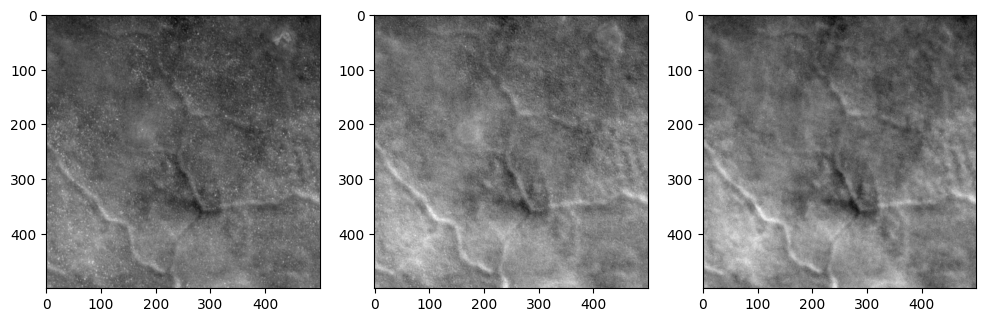

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.imshow(red, cmap='gray')
ax2.imshow(green, cmap='gray')
ax3.imshow(blue, cmap='gray')

#### Usando o Numpy, podemos empilhar os arrays anteriores e usar o Matplotlib para plotar uma imagem colorida, mas primeiro precisamos normalizar seus valores:

In [76]:
import numpy


In [77]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

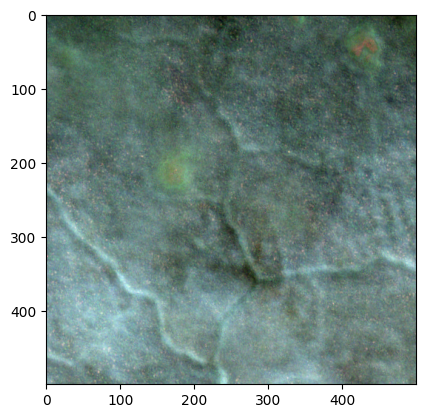

In [78]:
rgb = numpy.dstack((normalize(red), normalize(green), normalize(blue)))
plt.imshow(rgb)

### Script básico de download


In [79]:
# import os
# from urllib.parse import urlparse

# import requests
# from pystac import Asset
# from tqdm import tqdm

# def download(asset: Asset, directory: str = None, chunk_size: int = 1024 * 16, **request_options) -> str:
#     """Smart download STAC Item asset.

#     This method uses a checksum validation and a progress bar to monitor download status.
#     """
#     if directory is None:
#         directory = ''

#     response = requests.get(asset.href, stream=True, **request_options)
#     output_file = os.path.join(directory, urlparse(asset.href)[2].split('/')[-1])
#     os.makedirs(directory, exist_ok=True)
#     total_bytes = int(response.headers.get('content-length', 0))
#     with tqdm.wrapattr(open(output_file, 'wb'), 'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
#         for chunk in response.iter_content(chunk_size=chunk_size):
#             fout.write(chunk)

# download(assets['B02'], 'images')
# download(assets['B03'], 'images')
# download(assets['B04'], 'images')

# # for asset in assets.values():
# #     download(asset, 'images')

In [87]:
item_search = service.search(bbox=(-54.6457, -25.4808, -54.5457, -25.3908),
                             datetime='2023-08-01/2024-03-01',
                             collections=['S2-16D-2'])
print(item_search.matched())

for item2 in item_search.items():
    ...
assets2 = item2.assets



14


In [90]:
def download(asset2: Asset, directory: str = "images", chunk_size: int = 1024 * 16, **request_options) -> str:
    """Baixa um ativo STAC e salva no diretório especificado."""
    os.makedirs(directory, exist_ok=True)
    output_file = os.path.join(directory, urlparse(asset2.href).path.split('/')[-1])
    
    response = requests.get(asset2.href, stream=True, **request_options)
    total_bytes = int(response.headers.get('content-length', 0))
    
    with tqdm.wrapattr(open(output_file, 'wb'), 'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
        for chunk in response.iter_content(chunk_size=chunk_size):
            fout.write(chunk)

    return output_file  # Retorna o caminho do arquivo baixado

def merge_rgb_tif(r,g,b, output_path: str = "images/sentinel2_image.tif"):
    """Combina as bandas R, G e B e salva como um arquivo GeoTIFF."""
    with rasterio.open(r) as red, \
         rasterio.open(g) as green, \
         rasterio.open(b) as blue:
        
        # Lê os dados das bandas
        r = red.read(1)
        g = green.read(1)
        b = blue.read(1)

        # Normaliza para 0-255
        def normalize(band):
            return ((band - band.min()) / (band.max() - band.min()) * 255).astype(np.uint8)

        rgb = np.stack([normalize(r), normalize(g), normalize(b)], axis=0)  # Formato (3, altura, largura)

        # Cria metadados para o novo arquivo
        profile = red.profile
        profile.update(
            count=3,  # Três bandas (RGB)
            dtype=rasterio.uint8,  # Salvar como uint8 para imagens coloridas
            driver="GTiff"  # Formato GeoTIFF
        )

        # Salva o arquivo GeoTIFF
        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(rgb[0], 1)  # Escreve a banda vermelha
            dst.write(rgb[1], 2)  # Escreve a banda verde
            dst.write(rgb[2], 3)  # Escreve a banda azul

        print(f"Imagem RGB GeoTIFF salva em: {output_path}")
        

r = download(assets2['B04'])
g = download(assets2['B03'])
b = download(assets2['B02'])


merge_rgb_tif(r,g,b)

S2-16D_V2_021032_20230728_B04.tif: 100%|██████████| 92.8M/92.8M [00:44<00:00, 2.20MB/s]
S2-16D_V2_021032_20230728_B03.tif: 100%|██████████| 90.0M/90.0M [00:05<00:00, 15.8MB/s]
S2-16D_V2_021032_20230728_B02.tif: 100%|██████████| 85.7M/85.7M [00:10<00:00, 8.84MB/s]


Imagem RGB GeoTIFF salva em: images/sentinel2_image.tif
